密度為基礎的空間集群法(DBSCAN, Density-Based spatial Clustering of Applications with Noise)也是一種群集方法，他尤其能處理不是球狀分布的資料點。或著說，因為k-means會假設集群是球狀的，所以會導致一些奇怪的結果，比如說:

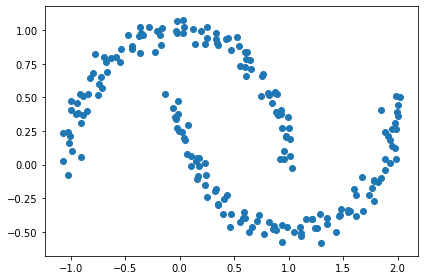

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

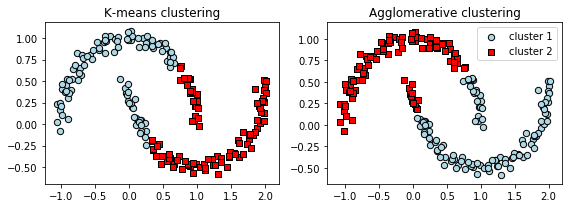

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# 用k-means試試看
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# 用凝聚分析試試看
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

值觀上來看這絕對不是我們想要的分類結果，就算是凝聚分析也差強人意。因此DBSCAN有其優越性。在介紹它之前，我們要先認識幾個名詞:
1. 密度:給定一個半徑$\epsilon$內樣本的個數
2. 核心點:給定一數MinPts，若以某點為中心，半徑$\epsilon$內包含了MinPts個點，就稱該點是核心點
3. 邊緣點:若以某點為中心，半徑$\epsilon$內包含少於MinPts個點，就稱該點是邊緣點
4. 雜訊點: 非核心點也非邊緣點的點
5. 連接: 若兩個核心點的距離小於$\epsilon$，就稱為連接點

這個定義多少有些拓撲學的味道，而DBSCAN的步驟如下:
1. 使相連接的核心點形成一個集群，無連接點的核心點自成一族群
2. 將邊緣點指派到對應的核心點群集

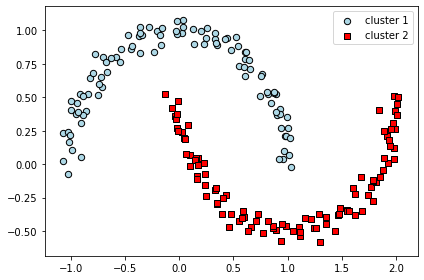

In [6]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

結果顯示DBSCAN可對付各種形狀的數據。但它也有顯而易見的缺點:維數災難。特徵太多的話，歐式距離會失去意義，致使好的(min_samples,eps)組合不好找。因此建議在實行前應先做降維。